In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split




In [3]:
df = pd.read_csv('../../datas/E4/C1/C1_main_formated.csv', sep=',', encoding='UTF-8')
df_2 = pd.read_csv('../../datas/E4/C4/C4_formated.csv', sep=',', encoding='UTF-8')

df = pd.concat([df,df_2])
print(df.columns)


Index(['Breaks', 'Date', 'Time', 'HP [R]', 'O2 [R]', 'CO2 [R]', 'O2_MMOL [R]',
       'POIDS_1 [R]', 'POIDS_2 [R]', 'POIDS_3 [R]',
       ...
       'TEMP_ENTREE_FOND_ECORIUM [R]', 'TEMP_SORTIE_FOND_ECORIUM [R]',
       'BP_R134_EN_BARS [R]', 'HP_R134_EN_BARS [R]', 'BP_R134_EN_DEGRES [R]',
       'HP_R134_EN_DEGRES [R]', 'CONSIGNE_BALLON_CHAUD [R]',
       'CONSIGNE_BALLON_FROID [R]', 'TEMPERATURE_MEG_CHAUD [R]',
       'TEMPERATURE_MEG_FROID [R]'],
      dtype='object', length=127)


In [4]:
df['ecart_temp'] = df['TEMPERATURE_CONSIGNE [R]'] - df['TEMPERATURE_REPRISE [R]']
df['alerte_temp'] = (df['ecart_temp'].abs() > 2).astype(int)
df.drop(columns=['Date' , 'Time' , 'Breaks'], inplace=True)

In [5]:
#df['index'] = df.index
print(df.head())


      HP [R]     O2 [R]  CO2 [R]  O2_MMOL [R]  POIDS_1 [R]  POIDS_2 [R]  \
0   0.000000        0.0      0.0          0.0 -1000.000000 -1000.000000   
1  33.102051  1638300.0    359.0          0.0   178.333333   158.333333   
2  33.102051  1638300.0    359.0          0.0   178.333333   158.333333   
3  31.869341  1638300.0    359.0          0.0   178.000000   158.333333   
4  31.477434  1638300.0    358.0          0.0   177.666667   158.333333   

   POIDS_3 [R]  CO2_MMOL [R]  DEFAUT_BP [B]  DEFAUT_HP [B]  ...  \
0 -1000.000000           0.0            0.0            0.0  ...   
1   157.666667           0.0            1.0            1.0  ...   
2   157.666667           0.0            0.0            0.0  ...   
3   157.666667           0.0            0.0            0.0  ...   
4   158.000000           0.0            0.0            0.0  ...   

   BP_R134_EN_BARS [R]  HP_R134_EN_BARS [R]  BP_R134_EN_DEGRES [R]  \
0                  NaN                  NaN                    NaN   
1     

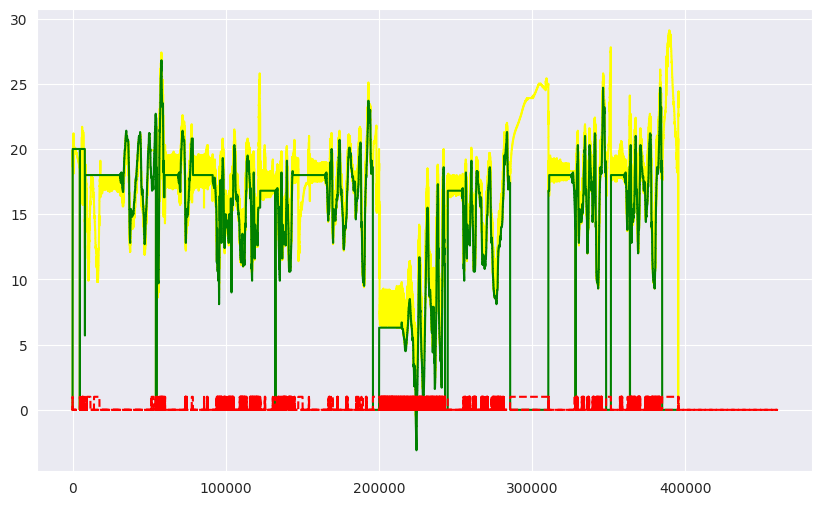

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(df['TEMPERATURE_REPRISE [R]'], label="Données reprise", color="yellow")
plt.plot(df['TEMPERATURE_CONSIGNE [R]'], label="Données reprise", color="green")
plt.plot(df['alerte_temp'], label="alerte de probleme", color="red", linestyle="dashed")

plt.show()

In [8]:
corrmat = df.corr()
corrmat

HP [R]    O2 [R]   CO2 [R]  O2_MMOL [R]  \
HP [R]                     1.000000  0.026081 -0.193427          NaN   
O2 [R]                     0.026081  1.000000  0.039823          NaN   
CO2 [R]                   -0.193427  0.039823  1.000000          NaN   
O2_MMOL [R]                     NaN       NaN       NaN          NaN   
POIDS_1 [R]                0.248694  0.086059  0.055129          NaN   
...                             ...       ...       ...          ...   
CONSIGNE_BALLON_FROID [R]       NaN       NaN       NaN          NaN   
TEMPERATURE_MEG_CHAUD [R]       NaN       NaN       NaN          NaN   
TEMPERATURE_MEG_FROID [R]       NaN       NaN       NaN          NaN   
ecart_temp                -0.081613 -0.002042 -0.044523          NaN   
alerte_temp               -0.024050  0.002762 -0.043296          NaN   

                           POIDS_1 [R]  POIDS_2 [R]  POIDS_3 [R]  \
HP [R]                        0.248694     0.250236     0.243422   
O2 [R]                        0.086059     0.090015     0.091173   
CO2 [R]                       0.055129     0.058305     0.058214   
O2_MMOL [R]                        NaN          NaN          NaN   
POIDS_1 [R]                   1.000000     0.999760     0.999813   
...                                ...          ...          ...   
CONSIGNE_BALLON_FROID [R]          NaN          NaN          NaN   
TEMPERATURE_MEG_CHAUD [R]          NaN          NaN          NaN   
TEMPERATURE_MEG_FROID [R]          NaN          NaN          NaN   
ecart_temp                   -0.103505    -0.105350    -0.104421   
alerte_temp                   0.061293     0.060280     0.061528   

                           CO2_MMOL [R]  DEFAUT_BP [B]  DEFAUT_HP [B]  ...  \
HP [R]                              NaN       0.070359      -0.089680  ...   
O2 [R]                              NaN       0.045443       0.013834  ...   
CO2 [R]                             NaN      -0.115871      -0.058920  ...   
O2_MMOL [R]                         NaN            NaN            NaN  ...   
POIDS_1 [R]                         NaN       0.480983       0.097929  ...   
...                                 ...            ...            ...  ...   
CONSIGNE_BALLON_FROID [R]           NaN            NaN            NaN  ...   
TEMPERATURE_MEG_CHAUD [R]           NaN            NaN            NaN  ...   
TEMPERATURE_MEG_FROID [R]           NaN            NaN            NaN  ...   
ecart_temp                          NaN      -0.054407       0.354042  ...   
alerte_temp                         NaN       0.051525      -0.026248  ...   

                           BP_R134_EN_BARS [R]  HP_R134_EN_BARS [R]  \
HP [R]                                     NaN                  NaN   
O2 [R]                                     NaN                  NaN   
CO2 [R]                                    NaN                  NaN   
O2_MMOL [R]                                NaN                  NaN   
POIDS_1 [R]                                NaN                  NaN   
...                                        ...                  ...   
CONSIGNE_BALLON_FROID [R]             0.093072             0.107185   
TEMPERATURE_MEG_CHAUD [R]             0.410952            -0.411580   
TEMPERATURE_MEG_FROID [R]             0.130491             0.737777   
ecart_temp                                 NaN                  NaN   
alerte_temp                                NaN                  NaN   

                           BP_R134_EN_DEGRES [R]  HP_R134_EN_DEGRES [R]  \
HP [R]                                       NaN                    NaN   
O2 [R]                                       NaN                    NaN   
CO2 [R]                                      NaN                    NaN   
O2_MMOL [R]                                  NaN                    NaN   
POIDS_1 [R]                                  NaN                    NaN   
...                                          ...                    ...   
CONSIGNE_BALLON_FROID [R]       

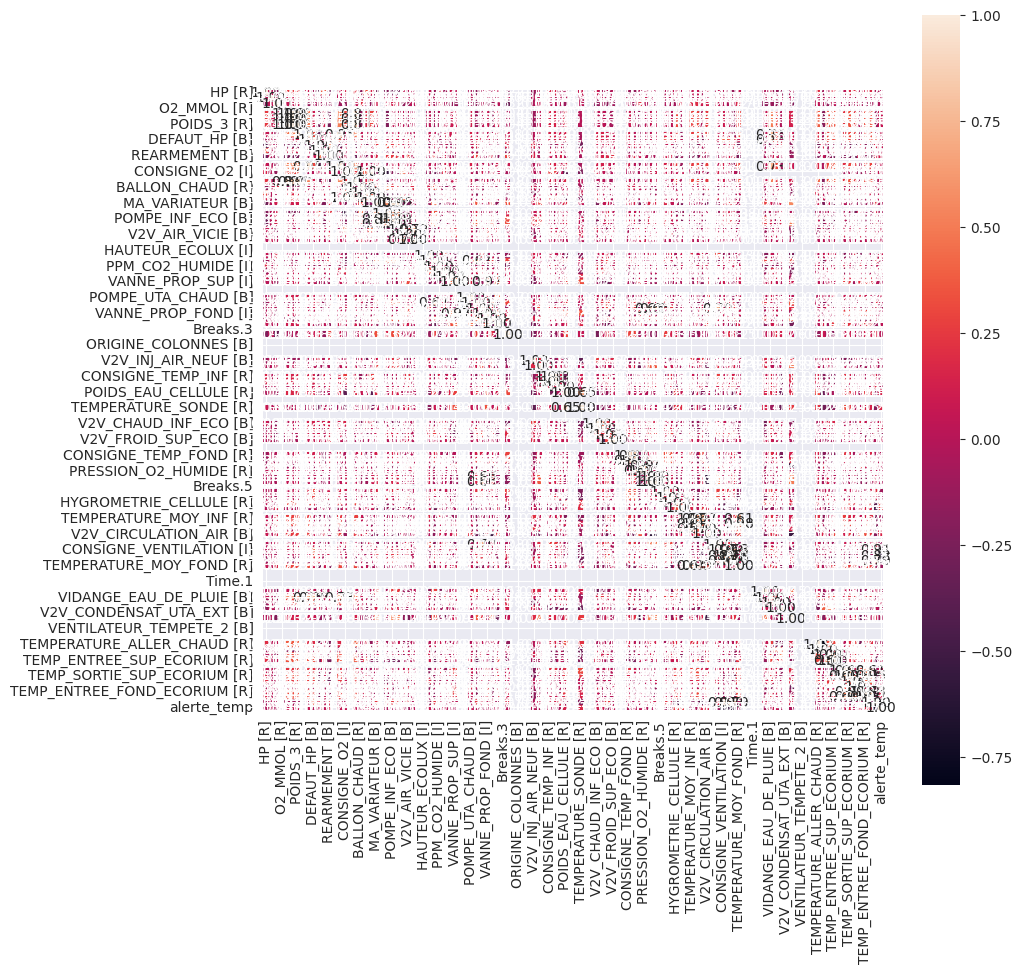

In [7]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=1, square=True,annot=True, fmt='.2f', annot_kws={'size': 10});

In [9]:
k = 15 #number of variables for heatmap
col_posi = corrmat.nlargest(k, 'alerte_temp')['alerte_temp'].index
col_posi = df[col_posi].corr()
col_posi

alerte_temp  HYGROMETRIE_CELLULE [R]  \
alerte_temp                      1.000000                 0.248968   
HYGROMETRIE_CELLULE [R]          0.248968                 1.000000   
PRESSION_CO2_HUMIDE [R]          0.237621                 0.305279   
TEMP_ENTREE_FOND_ECORIUM [R]     0.168525                 0.225311   
TEMPERATURE_SONDE [R]            0.163974                 0.214192   
V2V_CIRCULATION_AIR [B]          0.160275                 0.057431   
TEMPERATURE_REPRISE [R]          0.150802                -0.029167   
TEMP_SORTIE_SUP_ECORIUM [R]      0.145043                 0.277209   
POIDS_EAU_CELLULE [R]            0.140666                 0.244153   
TEMP_SORTIE_FOND_ECORIUM [R]     0.122335                 0.253889   
REARMEMENT [B]                   0.118867                -0.203743   
V2V_CHAUD_INF_ECO [B]            0.086897                -0.130256   
HUMIDIFICATEUR [I]               0.077027                -0.046596   
V2V_CHAUD_SUP_ECO [B]            0.070865                 0.027773   
HYGROMETRIE_SOUFFLAGE [R]        0.067665                 0.118645   

                              PRESSION_CO2_HUMIDE [R]  \
alerte_temp                                  0.237621   
HYGROMETRIE_CELLULE [R]                      0.305279   
PRESSION_CO2_HUMIDE [R]                      1.000000   
TEMP_ENTREE_FOND_ECORIUM [R]                 0.155752   
TEMPERATURE_SONDE [R]                        0.191191   
V2V_CIRCULATION_AIR [B]                      0.132931   
TEMPERATURE_REPRISE [R]                      0.224140   
TEMP_SORTIE_SUP_ECORIUM [R]                  0.193543   
POIDS_EAU_CELLULE [R]                        0.065153   
TEMP_SORTIE_FOND_ECORIUM [R]                 0.168310   
REARMEMENT [B]                              -0.134080   
V2V_CHAUD_INF_ECO [B]                       -0.007111   
HUMIDIFICATEUR [I]                           0.086119   
V2V_CHAUD_SUP_ECO [B]                       -0.132727   
HYGROMETRIE_SOUFFLAGE [R]                   -0.062976   

                              TEMP_ENTREE_FOND_ECORIUM [R]  \
alerte_temp                                       0.168525   
HYGROMETRIE_CELLULE [R]                           0.225311   
PRESSION_CO2_HUMIDE [R]                           0.155752   
TEMP_ENTREE_FOND_ECORIUM [R]                      1.000000   
TEMPERATURE_SONDE [R]                             0.153076   
V2V_CIRCULATION_AIR [B]                           0.325501   
TEMPERATURE_REPRISE [R]                          -0.018023   
TEMP_SORTIE_SUP_ECORIUM [R]                       0.868891   
POIDS_EAU_CELLULE [R]                             0.243527   
TEMP_SORTIE_FOND_ECORIUM [R]                      0.830442   
REARMEMENT [B]                                   -0.184616   
V2V_CHAUD_INF_ECO [B]                             0.044553   
HUMIDIFICATEUR [I]                               -0.063404   
V2V_CHAUD_SUP_ECO [B]                            -0.055195   
HYGROMETRIE_SOUFFLAGE [R]                         0.115954   

                              TEMPERATURE_SONDE [R]  V2V_CIRCULATION_AIR [B]  \
alerte_temp                                0.163974                 0.160275   
HYGROMETRIE_CELLULE [R]                    0.214192                 0.057431   
PRESSION_CO2_HUMIDE [R]                    0.191191                 0.132931   
TEMP_ENTREE_FOND_ECORIUM [R]               0.153076                 0.325501   
TEMPERATURE_SONDE [R]                      1.000000                -0.089347   
V2V_CIRCULATION_AIR [B]                   -0.089347                 1.000000   
TEMPERATURE_REPRISE [R]                   -0.122838                -0.109999   
TEMP_SORTIE_SUP_ECORIUM [R]                0.241134                 0.235643   
POIDS_EAU_CELLULE [R]                      0.652700                 0.029483   
TEMP_SORTIE_FOND_ECORIUM [R]               0.147206                 0.225788   
REARMEMENT [B]                            -0.058756                -0.109481   
V2V_CHAUD_INF_ECO [B]                     -

In [10]:
k = 15 #number of variables for heatmap
col_nega = corrmat.nsmallest(k, 'alerte_temp')['alerte_temp'].index
col_nega = df[col_nega].corr()

In [11]:
corr = pd.concat([col_posi, col_nega], axis=1)
corr = corr.corr()
corr

alerte_temp  HYGROMETRIE_CELLULE [R]  \
alerte_temp                      1.000000                 0.244976   
HYGROMETRIE_CELLULE [R]          0.244976                 1.000000   
PRESSION_CO2_HUMIDE [R]          0.256872                 0.437091   
TEMP_ENTREE_FOND_ECORIUM [R]    -0.003651                 0.353162   
TEMPERATURE_SONDE [R]            0.140577                 0.421837   
V2V_CIRCULATION_AIR [B]          0.059824                 0.051384   
TEMPERATURE_REPRISE [R]          0.122843                -0.128341   
TEMP_SORTIE_SUP_ECORIUM [R]     -0.017614                 0.408937   
POIDS_EAU_CELLULE [R]            0.063417                 0.420164   
TEMP_SORTIE_FOND_ECORIUM [R]    -0.031648                 0.384207   
REARMEMENT [B]                   0.015531                -0.538714   
V2V_CHAUD_INF_ECO [B]           -0.102994                -0.448947   
HUMIDIFICATEUR [I]              -0.056132                -0.289713   
V2V_CHAUD_SUP_ECO [B]           -0.140699                -0.285219   
HYGROMETRIE_SOUFFLAGE [R]       -0.143672                 0.004642   
ecart_temp                            NaN                      NaN   
TEMPERATURE_CONSIGNE [R]              NaN                      NaN   
CONSIGNE_VENTILATION [I]              NaN                      NaN   
HYGROMETRIE_CONSIGNE [I]              NaN                      NaN   
V2V_FROID_INF_ECO [B]                 NaN                      NaN   
V2V_AIR_VICIE [B]                     NaN                      NaN   
TEMPERATURE_MOY_FOND [R]              NaN                      NaN   
V2V_CONDENS_UTA_INT [B]               NaN                      NaN   
V2V_CAPTAGE_CO2 [B]                   NaN                      NaN   
V2V_CHAUD_FOND_ECO [B]                NaN                      NaN   
TEMPERATURE_MOY_INF [R]               NaN                      NaN   
V2V_FROID_FOND_ECO [B]                NaN                      NaN   
V2V_VIDANGE_CANIVEAU [B]              NaN                      NaN   
VANNE_UTA_CHAUD [I]                   NaN                      NaN   
DESHUMIDIFICATEUR [B]                 NaN                      NaN   

                              PRESSION_CO2_HUMIDE [R]  \
alerte_temp                                  0.256872   
HYGROMETRIE_CELLULE [R]                      0.437091   
PRESSION_CO2_HUMIDE [R]                      1.000000   
TEMP_ENTREE_FOND_ECORIUM [R]                 0.159619   
TEMPERATURE_SONDE [R]                        0.255352   
V2V_CIRCULATION_AIR [B]                      0.092565   
TEMPERATURE_REPRISE [R]                      0.311766   
TEMP_SORTIE_SUP_ECORIUM [R]                  0.206505   
POIDS_EAU_CELLULE [R]                        0.050249   
TEMP_SORTIE_FOND_ECORIUM [R]                 0.194043   
REARMEMENT [B]                              -0.445442   
V2V_CHAUD_INF_ECO [B]                       -0.311672   
HUMIDIFICATEUR [I]                          -0.007833   
V2V_CHAUD_SUP_ECO [B]                       -0.490638   
HYGROMETRIE_SOUFFLAGE [R]                   -0.344227   
ecart_temp                                        NaN   
TEMPERATURE_CONSIGNE [R]                          NaN   
CONSIGNE_VENTILATION [I]                          NaN   
HYGROMETRIE_CONSIGNE [I]                          NaN   
V2V_FROID_INF_ECO [B]                             NaN   
V2V_AIR_VICIE [B]                                 NaN   
TEMPERATURE_MOY_FOND [R]                          NaN   
V2V_CONDENS_UTA_INT [B]                           NaN   
V2V_CAPTAGE_CO2 [B]                               NaN   
V2V_CHAUD_FOND_ECO [B]                            NaN   
TEMPERATURE_MOY_INF [R]                           NaN   
V2V_FROID_FOND_ECO [B]                            NaN   
V2V_VIDANGE_CANIVEAU [B]                          NaN   
VANNE_UTA_CHAUD [I]                               NaN   
DESHUMIDIFICATEUR [B]                             NaN   

                              TEMP_ENTREE_FOND_ECORIUM [R]  \
alerte_temp                  

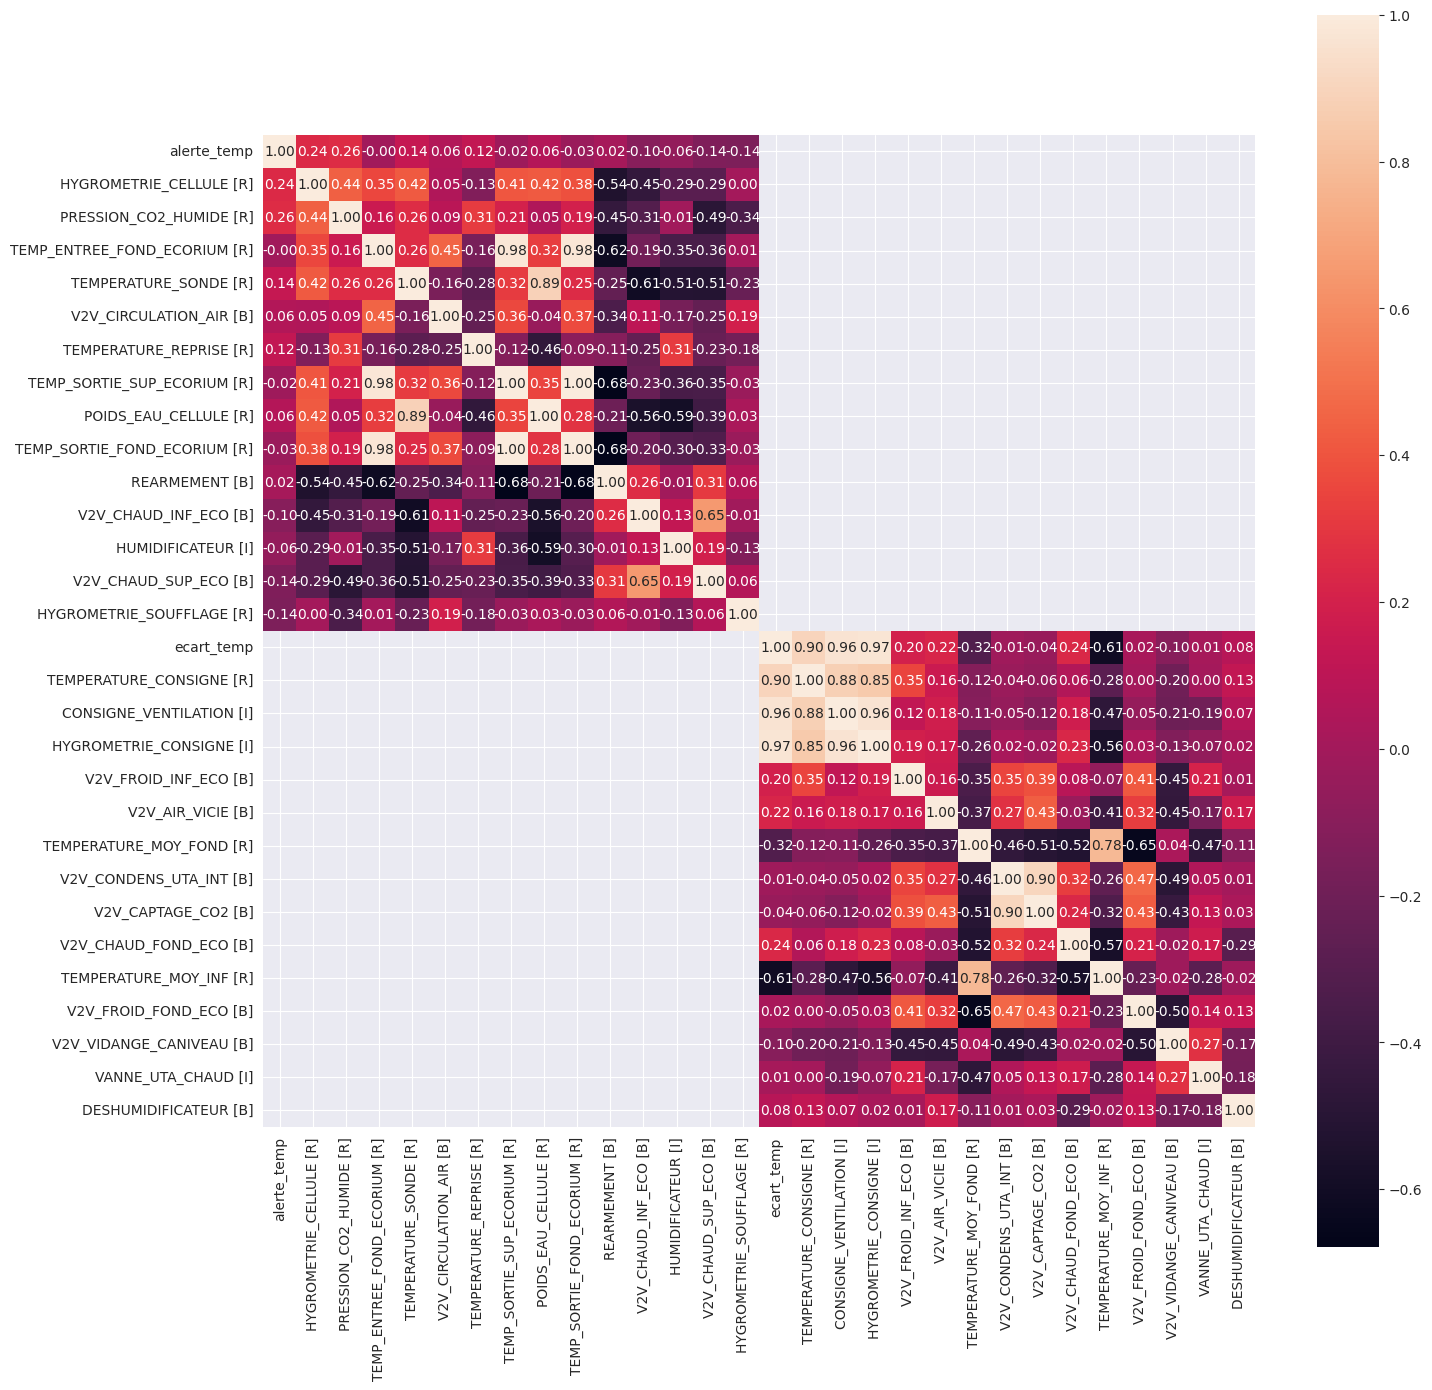

In [12]:
f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(corr, vmax=1, square=True,annot=True, fmt='.2f', annot_kws={'size': 10});

In [13]:
df_sample = df.columns.drop('alerte_temp');
df_sample = df_sample.drop('ecart_temp')


In [14]:
features = df_sample.tolist()

print(features)

['HP [R]', 'O2 [R]', 'CO2 [R]', 'O2_MMOL [R]', 'POIDS_1 [R]', 'POIDS_2 [R]', 'POIDS_3 [R]', 'CO2_MMOL [R]', 'DEFAUT_BP [B]', 'DEFAUT_HP [B]', 'A_SECONDES [I]', 'IRRADIANCE [I]', 'REARMEMENT [B]', 'Breaks.1', 'ARU_CELLULE [B]', 'CONSIGNE_O2 [I]', 'Etat_Mesure [B]', 'POIDS_TOTAL [R]', 'BALLON_CHAUD [R]', 'BALLON_FROID [R]', 'CONSIGNE_CO2 [I]', 'MA_VARIATEUR [B]', 'COMPRESSEUR_1 [B]', 'COMPRESSEUR_2 [B]', 'POMPE_INF_ECO [B]', 'POMPE_SUP_ECO [B]', 'PPM_O2_HUMIDE [R]', 'V2V_AIR_VICIE [B]', 'V2V_EAU_PLUIE [I]', 'Breaks.2', 'HAUTEUR_ECOLUX [I]', 'HUMIDIFICATEUR [I]', 'POMPE_FOND_ECO [B]', 'PPM_CO2_HUMIDE [I]', 'V2V_DESHUMIDIF [B]', 'VANNE_PROP_INF [I]', 'VANNE_PROP_SUP [I]', 'FERMETURE_PORTE [B]', 'MOLE_O2_DERIVEE [R]', 'POMPE_UTA_CHAUD [B]', 'POMPE_UTA_FROID [B]', 'V2V_CAPTAGE_CO2 [B]', 'VANNE_PROP_FOND [I]', 'VANNE_UTA_CHAUD [I]', 'VANNE_UTA_FROID [I]', 'Breaks.3', 'VENTILATEUR_CTA [B]', 'MOLE_CO2_DERIVEE [R]', 'ORIGINE_COLONNES [B]', 'V2V_INJECTION_N2 [B]', 'V2V_INJECTION_O2 [B]', 'V2V_INJ

In [15]:
from sklearn.preprocessing import StandardScaler

out = df['alerte_temp']

colonnes_numeriques = df.select_dtypes(include=['float64']).columns

# 2. Création du scaler
scaler = StandardScaler()

# 3. Appliquer le scaler
df[colonnes_numeriques] = scaler.fit_transform(df[colonnes_numeriques])

# df est maintenant standardisé
print(df.head())


/home/deva/octopus_brain/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/deva/octopus_brain/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/home/deva/octopus_brain/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


     HP [R]      O2 [R]   CO2 [R]  O2_MMOL [R]  POIDS_1 [R]  POIDS_2 [R]  \
0 -5.391486 -181.091729 -7.211539          0.0   -15.584608   -16.300963   
1 -1.039471    0.005522 -0.868263          0.0    -4.591094    -4.637357   
2 -1.039471    0.005522 -0.868263          0.0    -4.591094    -4.637357   
3 -1.201539    0.005522 -0.868263          0.0    -4.594204    -4.637357   
4 -1.253064    0.005522 -0.885932          0.0    -4.597314    -4.637357   

   POIDS_3 [R]  CO2_MMOL [R]  DEFAUT_BP [B]  DEFAUT_HP [B]  ...  \
0   -16.510666           0.0       -9.61820      -2.978612  ...   
1    -4.624830           0.0        0.10397       0.335727  ...   
2    -4.624830           0.0       -9.61820      -2.978612  ...   
3    -4.624830           0.0       -9.61820      -2.978612  ...   
4    -4.621407           0.0       -9.61820      -2.978612  ...   

   BP_R134_EN_BARS [R]  HP_R134_EN_BARS [R]  BP_R134_EN_DEGRES [R]  \
0                  NaN                  NaN                    NaN   


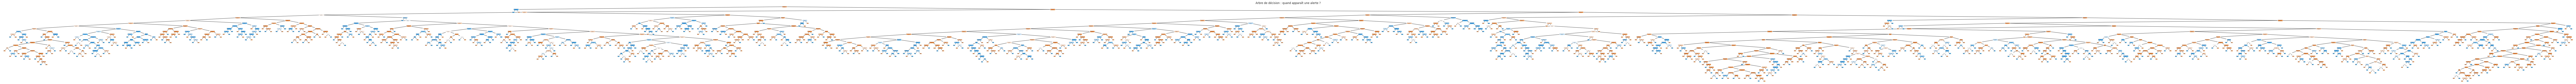

In [16]:
# Choix des variables
X = df[features]
y = out

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(max_depth=90)
model.fit(X_train, y_train)


plt.figure(figsize=(200, 6))
plot_tree(model, feature_names=features, class_names=['Normal', 'Alerte'], filled=True)
plt.title("Arbre de décision : quand apparaît une alerte ?")
plt.show()


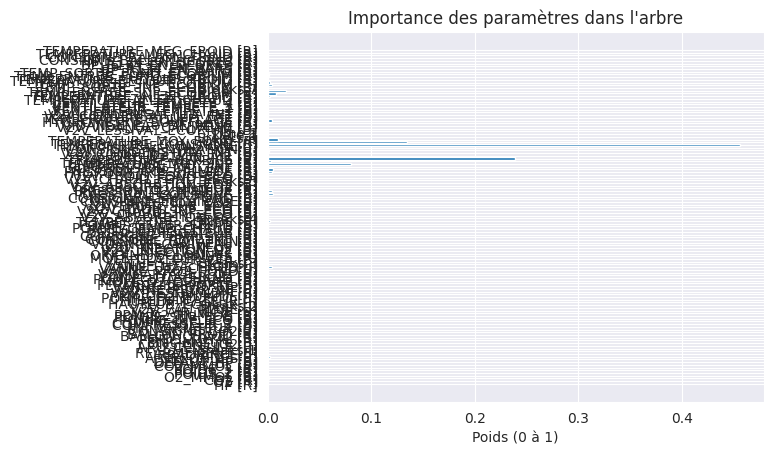

HP [R] 0.000682448018374083
O2 [R] 0.0
CO2 [R] 0.0009970894734294682
O2_MMOL [R] 0.0
POIDS_1 [R] 5.586514321955328e-05
POIDS_2 [R] 0.00011618335242673154
POIDS_3 [R] 0.0002864609551613949
CO2_MMOL [R] 0.0
DEFAUT_BP [B] 0.0
DEFAUT_HP [B] 0.0
A_SECONDES [I] 0.002715162697079265
IRRADIANCE [I] 0.0003163839699143859
REARMEMENT [B] 0.0
Breaks.1 0.0
ARU_CELLULE [B] 0.0
CONSIGNE_O2 [I] 0.0
Etat_Mesure [B] 0.0
POIDS_TOTAL [R] 0.00021607468454618768
BALLON_CHAUD [R] 0.0002932762520391812
BALLON_FROID [R] 0.0005746679306992661
CONSIGNE_CO2 [I] 1.0321609714163484e-05
MA_VARIATEUR [B] 4.617077202496335e-05
COMPRESSEUR_1 [B] 0.0
COMPRESSEUR_2 [B] 0.0003773189670220531
POMPE_INF_ECO [B] 0.0
POMPE_SUP_ECO [B] 0.0
PPM_O2_HUMIDE [R] 0.0005370847909143267
V2V_AIR_VICIE [B] 0.0
V2V_EAU_PLUIE [I] 0.0
Breaks.2 0.0
HAUTEUR_ECOLUX [I] 0.0
HUMIDIFICATEUR [I] 0.0001057953687791011
POMPE_FOND_ECO [B] 0.0
PPM_CO2_HUMIDE [I] 0.0010798673187211616
V2V_DESHUMIDIF [B] 1.1611810928433922e-05
VANNE_PROP_INF [I] 1.4619

In [17]:
importances = model.feature_importances_
features = X.columns

# Affichage graphique
plt.barh(features, importances)
plt.title("Importance des paramètres dans l'arbre")
plt.xlabel("Poids (0 à 1)")
plt.show()
for i in range(len(importances)):
    print(features[i], importances[i])

In [18]:
for i in range(len(importances)):
    if importances[i] > 1.0:
        print(features[i], importances[i])

In [19]:
df_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
})
df_importances = df_importances.sort_values(by='Importance', ascending=False)

# Garder uniquement les 10 premières
top = df_importances.head(20)

# Afficher les résultats
print(top)

                         Feature  Importance
88      HYGROMETRIE_CONSIGNE [I]    0.455982
83       TEMPERATURE_REPRISE [R]    0.238866
89      TEMPERATURE_CONSIGNE [R]    0.135036
81       TEMPERATURE_MOY_INF [R]    0.080422
108  TEMP_ENTREE_SUP_ECORIUM [R]    0.017536
90      TEMPERATURE_MOY_FOND [R]    0.010063
107  TEMP_ENTREE_INF_ECORIUM [R]    0.008328
70        POIDS_EAU_CONSIGNE [R]    0.005579
79       PRESSION_CO2_HUMIDE [R]    0.005050
43           VANNE_UTA_CHAUD [I]    0.004500
71        PRESSION_EXTERIEUR [R]    0.004356
78       HYGROMETRIE_CELLULE [R]    0.004132
97     HYGROMETRIE_SOUFFLAGE [R]    0.003930
110  TEMP_SORTIE_INF_ECORIUM [R]    0.003777
82       TEMPERATURE_MOY_SUP [R]    0.003136
10                A_SECONDES [I]    0.002715
111  TEMP_SORTIE_SUP_ECORIUM [R]    0.001886
60         TEMPERATURE_SONDE [R]    0.001876
106  TEMPERATURE_ALLER_FROID [R]    0.001863
86       V2V_CONDENS_UTA_INT [B]    0.001474


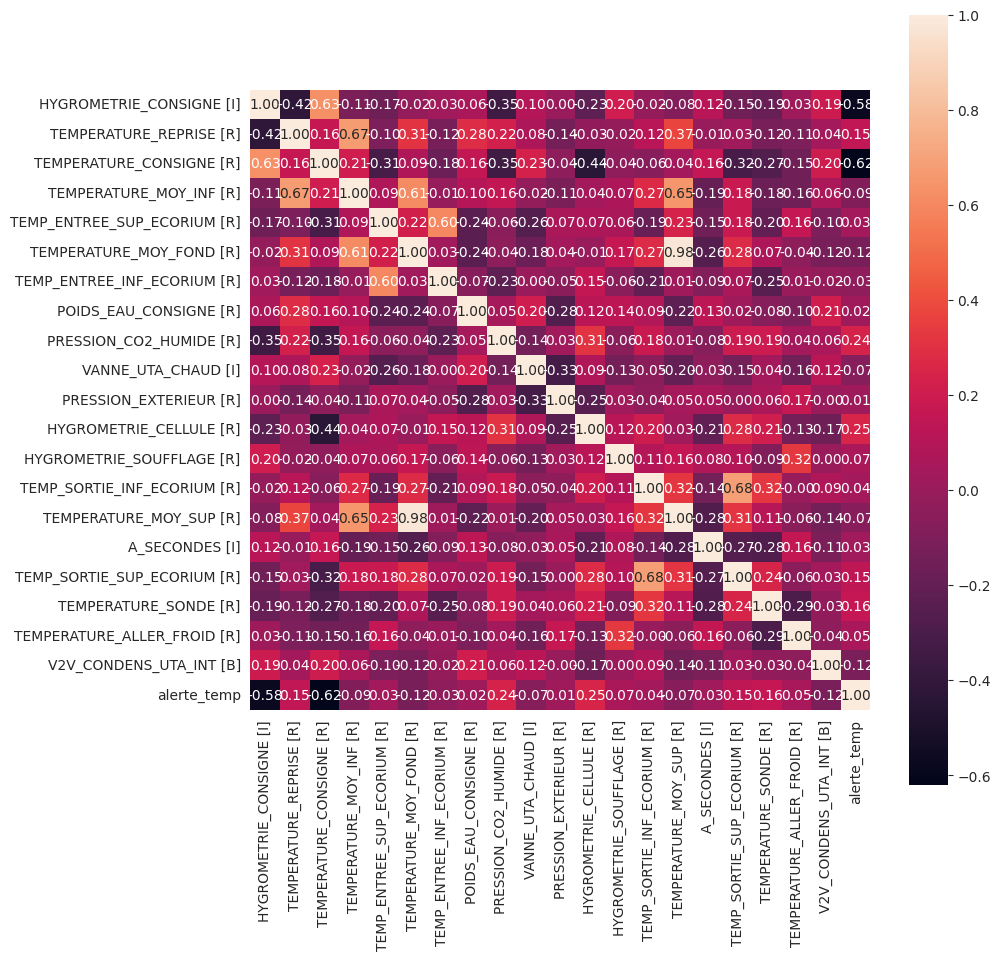

In [20]:
heat_map = df[top['Feature']]
heat_map = pd.concat([heat_map , df['alerte_temp']], axis=1)
corr = heat_map.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, vmax=1, square=True,annot=True, fmt='.2f', annot_kws={'size': 10});

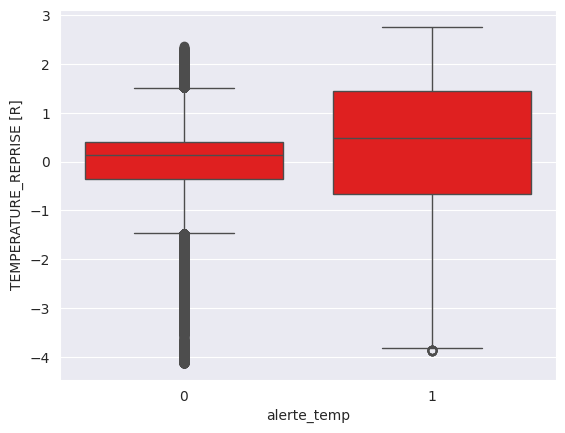

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df, x='alerte_temp', y='TEMPERATURE_REPRISE [R]' , color='red');


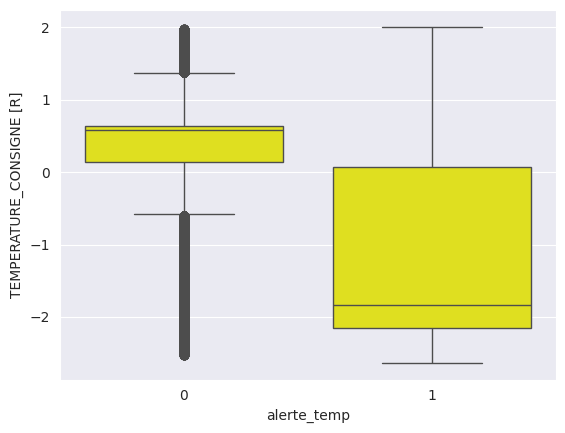

In [21]:
sns.boxplot(data=df, x='alerte_temp', y='TEMPERATURE_CONSIGNE [R]' , color='yellow');

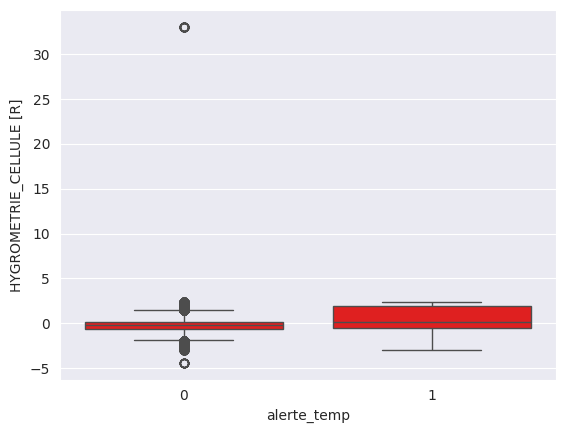

In [22]:
sns.boxplot(data=df, x='alerte_temp', y='HYGROMETRIE_CELLULE [R]' , color='red');



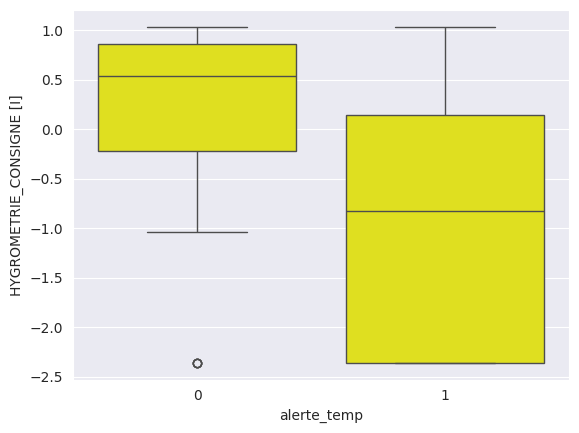

In [23]:
sns.boxplot(data=df, x='alerte_temp', y='HYGROMETRIE_CONSIGNE [I]' , color='yellow');

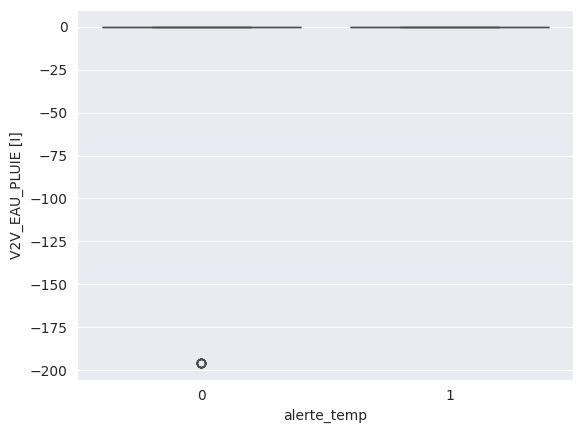

In [24]:
sns.boxplot(data=df, x='alerte_temp', y='V2V_EAU_PLUIE [I]' , color='yellow');

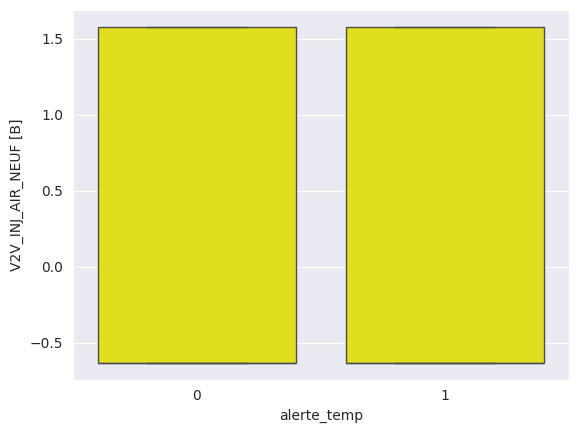

In [25]:
sns.boxplot(data=df, x='alerte_temp', y='V2V_INJ_AIR_NEUF [B]' , color='yellow');

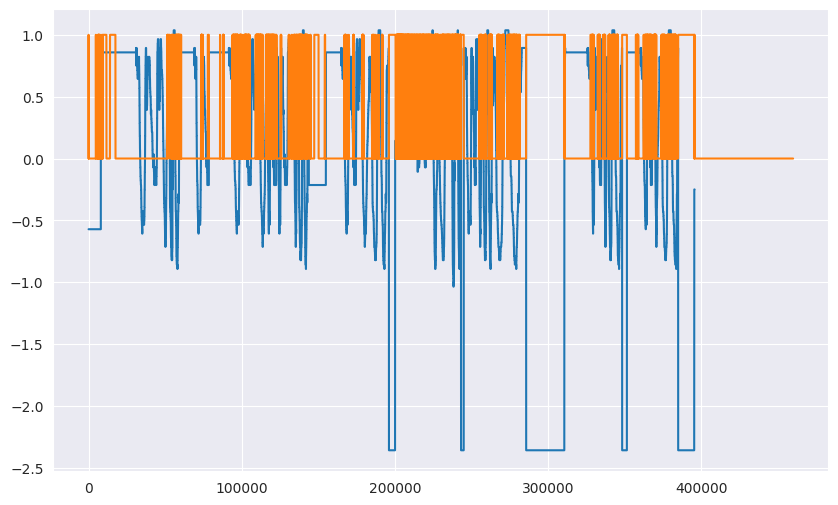

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(df['HYGROMETRIE_CONSIGNE [I]'])
#plt.plot(df['TEMPERATURE_REPRISE [R]'])
#plt.plot(df['TEMPERATURE_CONSIGNE [R]'])
plt.plot(df['alerte_temp'])
plt.show()

/tmp/ipykernel_432733/1605015182.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['index'] = df.index


<Axes: xlabel='TEMPERATURE_REPRISE [R]', ylabel='HYGROMETRIE_CONSIGNE [I]'>

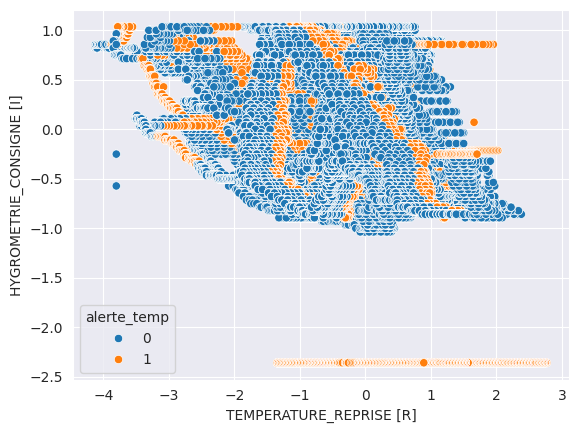

In [27]:
df['index'] = df.index
sns.scatterplot(data=df,
                x='TEMPERATURE_REPRISE [R]',
                y='HYGROMETRIE_CONSIGNE [I]',
                hue='alerte_temp')

<Axes: xlabel='index', ylabel='CONSIGNE_CO2 [I]'>

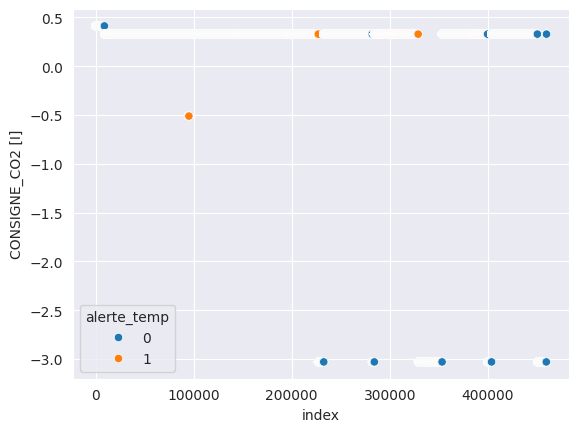

In [28]:
sns.scatterplot(data=df,
                x='index',
                y='CONSIGNE_CO2 [I]',
                hue='alerte_temp')

<Axes: xlabel='index', ylabel='HYGROMETRIE_CELLULE [R]'>

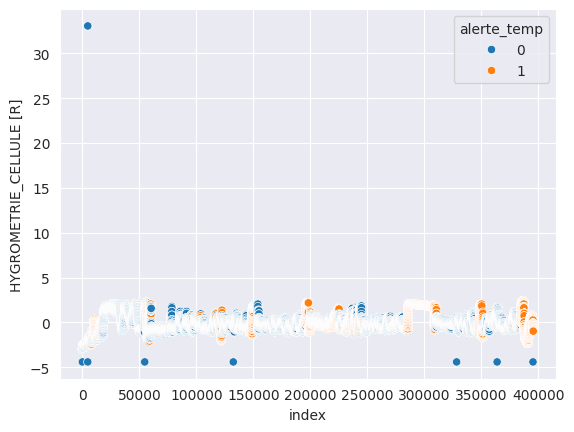

In [29]:
sns.scatterplot(data=df,
                x='index',
                y='HYGROMETRIE_CELLULE [R]',
                hue='alerte_temp')


<Axes: xlabel='index', ylabel='TEMPERATURE_REPRISE [R]'>

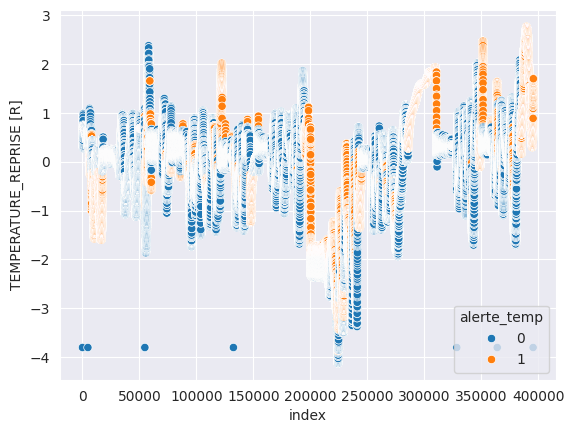

In [30]:
sns.scatterplot(data=df,
                x='index',
                y='TEMPERATURE_REPRISE [R]',
                hue='alerte_temp')


<Axes: xlabel='HYGROMETRIE_CONSIGNE [I]', ylabel='HYGROMETRIE_CELLULE [R]'>

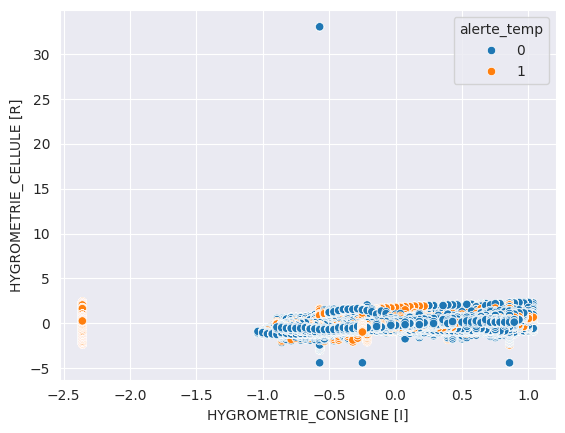

In [31]:
sns.scatterplot(data=df,
                x='HYGROMETRIE_CONSIGNE [I]',
                y='HYGROMETRIE_CELLULE [R]',
                hue='alerte_temp')


<Axes: xlabel='V2V_INJ_AIR_NEUF [B]', ylabel='HYGROMETRIE_CELLULE [R]'>

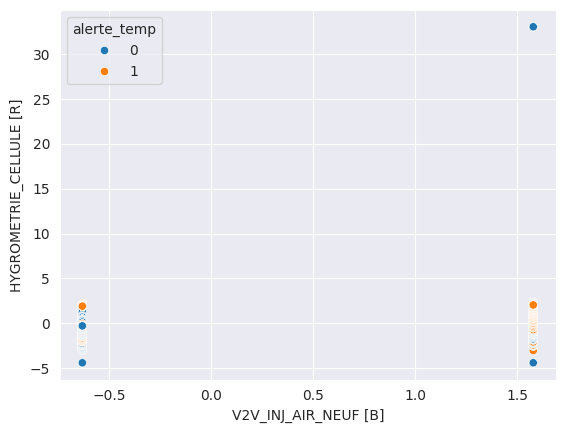

In [32]:
sns.scatterplot(data=df,
                x='V2V_INJ_AIR_NEUF [B]',
                y='HYGROMETRIE_CELLULE [R]',
                hue='alerte_temp')
